# Exploratory Data Analysis (EDA)
## Part 6: Preparing to Model (Bike Sharing case study)

<br/>

<div class="container">
    <div style="float:left;width:40%">
	    <img src="images/bikeshare_sun.jpg">
    </div>
    <div style="float:left;width:40%">
	    <img src="images/bikeshare_snow.png">
    </div>
</div>

*In this notebook, we will introduce the Capital Bike Sharing prediction problem and go through two major steps that occur before we build a machine learning model: Exploratory Data Analysis (EDA) and the test-train split.*

### Table of Contents

<ol start=6>
    <li><a href="section0">Preparing to Model</a>
        <ol type=a>
            <br>
            <li><a href="sectioncase">Case Study: Bike Sharing</a></li>
            <br>
            <li><a href="section1">Exploratory Data Analysis</a>
                <ul>
                    <li><a href="subsection1a">Data Types and Summary Statistics</a></li>
                    <br>
                    <li><a href="subsection1b">Exploratory Visualizations</a></li>
                </ul>
            </li>
            <br>
            <li><a href="section2">The Test-Train Split</a></li>
        </ol>
    </li>
    </ol>

In [14]:
# run this cell to import some necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import ipywidgets as widgets
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

## 6a. Case Study: Capital Bike Share <a id= "sectioncase"></a>

Bike-sharing systems have become increasingly popular worldwide as environmentally-friendly solutions to traffic congestion, inadequate public transit, and the "last-mile" problem. Capital Bikeshare runs one such system in the Washington, D.C. metropolitan area.

The Capital Bikeshare system comprises docks of bikes, strategically placed across the area, that can be unlocked by *registered* users who have signed up for a monthly or yearly plan or by *casual* users who pay by the hour or day. They collect data on the number of casual and registered users per hour and per day.

Let's say that Capital Bikeshare is interested in a **prediction** problem: predicting how many riders they can expect to have on a given day. [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) has combined the bike sharing data with information about weather conditions and holidays to try to answer this question.

In this notebook, we'll walk through the steps a data scientist would take to answer this question.

## 6b. Exploratory Data Analysis (EDA) <a id= "section1"></a>

> "It is important to understand what you CAN DO before you learn to measure how WELL you seem to have done it." -John W. Tukey, *Exploratory Data Analysis*

**Exploratory Data Analysis (EDA)** is the process of 'looking at data to see what it seems to say'. EDA is an essential first step toward answering any research question. Through this process, we hope to accomplish several things:
- learn about the overall 'shape' of the data: structure, organization, ranges of values
- assess what assumptions we can make about the data as a basis for later statistical inference
- figure out the appropriate tools and techniques for analysis 
- tentatively create testable, appropriate hypotheses or models

We will do this by looking at summary statistics and visualizations of the different variables.

###  Data Types <a id= "subsection1a"></a>

Before we know *how* to visualize the data, we need to know what types of data we're working with. Run the following cell to show our bike sharing training data.

In [15]:
# run this cell to load the data
# load the data from a csv file
bikes = pd.read_csv("data/day_renamed_dso.csv", index_col=0)

# convert the dates to Python datetime objects for easier sorting
bikes["date"] = pd.to_datetime(bikes["date"])

# show the first 5 rows
bikes.head()

,date,season,year,month,is holiday,week day,is work day,weather,temp,felt temp,humidity,windspeed,casual riders,registered riders,total riders
instant,,,,,,,,,,,,,,,
1,2011-01-01,spring,2011,1,no,saturday,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,spring,2011,1,no,sunday,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,spring,2011,1,no,monday,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,spring,2011,1,no,tuesday,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,spring,2011,1,no,wednesday,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


A few of the less straight-forward columns can be described as follows:
- **instant**: record index
- **is holiday** : "yes" if day is a holiday, "no" otherwise
- **is work day** : "yes" if day is not a weekend or holiday, otherwise "no"
- **weather** :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **felt temp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **humidity**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **total riders**: count of total rental bikes (casual + registered)

<div class="alert alert-warning">
<b>QUESTION:</b> Which of the variables are numerical and which are categorical? Intuitively, which do you think would be useful for predicting the number of riders on a given day? Would you choose different variables depending on if you wanted to predict casual versus registered rider counts?
</div>

**ANSWER:** 
numerical: temp, felt temp, humidity, windspeed, casual, registered, total riders
categorical: is holiday, is work day, season, all of the date variables, weather

Note that weather can be confusing, since the values are numbers. In fact, these numbers represent
different categories of weather (e.g. cloudy, sunny). While the categories can be ordered by severity, they
are not really a measurement like a numerical variable would be.

Answers will vary here. Intuitively, we might expect that fewer riders would ride on days with a very
cold temperature or very bad weather. Weather conditions also might affect casual riders more than registered,
since we might assume that registered riders are more likely to be commuters who cannot put off a
bike ride due to inclement weather. We also might expect that more casual riders would ride on weekends
or holidays, while the number of registered riders may be higher on workdays if they use their bikes to
commute.

### Summary Statistics
It can also be useful to know some *summary statistics* about the different variables: things like the minimum, maximum, and average. Earlier, we learned how to do this on individual columns using functions like `np.min`, `np.max`, and `np.average`.

Thankfully, we can generate a variety of summary statistics for many variables at the same time using a DataFrame method called `describe`. Run the following cell to generate the summary statistics using `describe`.

For each variable with numerical values, `describe` will give:
- the *count* of non-missing values
- the *mean* (average) of the variable
- the *standard deviation* 
- the 25th, 50th, and 75th *percentiles*
- the *minimum* and *maximum* values

In [16]:
# generate summary statistics
bikes.describe()

,date,year,month,weather,temp,felt temp,humidity,windspeed,casual riders,registered riders,total riders
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2011.500684,6.519836,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2011.000000,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2011.000000,4.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,2012.000000,7.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,2012.000000,10.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,2012.000000,12.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.500342,3.451913,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


<div class="alert alert-warning">
<b>QUESTION:</b> Looking at these statistics as data scientists, we're interested in a few things in particular:
<ul>
    <li>are there any values missing (e.g. days for which some data was not collected)? Look at the "count" row for a hint: there are 731 days of data, and the "count" row only counts rows with non-missing values.</li>
    <li>what ranges of values does each variable take?</li>
    <li>are there any extreme values that might throw off our analysis?</li>
    </ul>

Using the summary table, answer these questions below.
</div>

**ANSWER:** no missing values: all counts are 731 - temp, felt temp, humidity, and windspeed all range
between 0 and 1 (which makes sense, because according to the data dictionary they were normalized to fall
within that scale. Ridership tends to number in the thousands, although casual ridership counts are a bit
lower. - not at first glance. The means and medians (50th percentiles) of the variables are all very similar,
indicating that they aren’t very skewed. There are some very small and very large values for rider counts
(e.g. 2 is the minimum number of casual riders). Visualization will help us better understand how the data
are distributed.


### Visualization Continued: Numerical Data and Widgets <a id= "subsection1b"></a>
So far, we've worked largely with categorical variables, which we visualized with bar graphs. The bike sharing data contains several *numerical* variables, which will necessitate different visualizations.

You've previously used the `hist` function to visualize the distribution of a numerical variable. The following cell creates a **widget** that will make different histograms based on the variable you choose in the drop box. Run the cell to created the widget (don't worry too much about the details of the code).

In [17]:
# make the plots bigger
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a widget to plot and compare different histograms
explanatory_slider = widgets.Dropdown(options=["temp", "felt temp", "humidity", "windspeed"])
display(widgets.interactive(lambda x: bikes.hist(x, bins=30), x=explanatory_slider))

interactive(children=(Dropdown(description='x', options=('temp', 'felt temp', 'humidity', 'windspeed'), value=…

<div class="alert alert-warning">
<b>QUESTION:</b> Describe the distributions of the different variables. Are they normally distributed? Are any of them <i>skewed</i> (that is, do any of them have most of their values to the left or right of the histogram's center)? What values do each of them take on?
</div>

**ANSWER:** temp and felt temp: very similar in shape, with most of the data concentrated in the middle
of the distribution and a few rough peaks in the center. All values fall between 0 and 1 - humidity: almost
normally distributed, with a slight left skew. All values fall between 0 and 1 - windspeed: almost normally
distributed, with a slight right skew. All values fall between 0 and 1

To predict the number of riders (the **response variable**) based on an **explanatory variable**, we often want to plot them against one another. This is often best done using a scatter plot.

`scatterplot` is a Seaborn function that creates a scatter plot of one numerical variable versus another. The first argument, `x`, is the name of the variable to be plotted on the x-axis. The second, `y`, is the name of the variable on the y-axis. Finally, we assign our DataFrame of bikes data to the `data` argument.

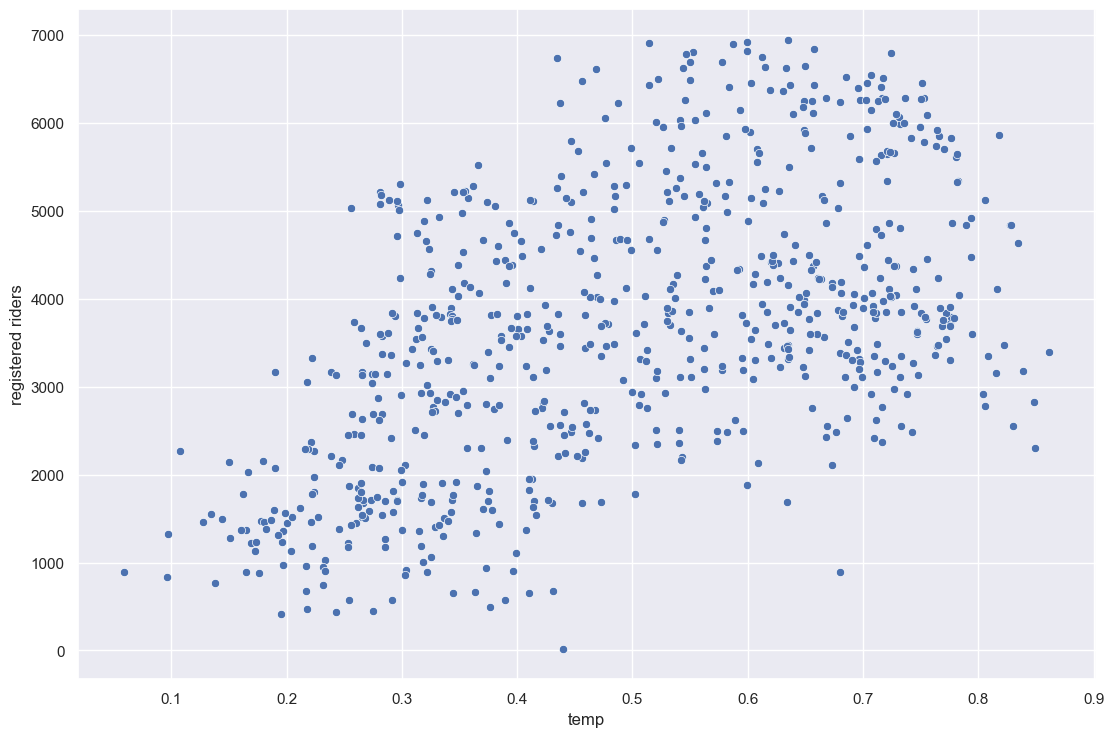

In [18]:
# example of scatter: plot the number of casual riders against registered riders
sns.scatterplot(x="temp", y="registered riders",
               data=bikes);

The shape of the scatter plot can give us some information about how two variables are **correlated**: what the value of one variable can or cannot tell you about the value of another.

<br/>

<div class="alert alert-warning">
<b>EXERCISE:</b> Try plotting at least one numerical explanatory variable (temp, felt temp, windspeed, or humidity) against a response variable (casual, registered, or total riders). What would you say about the relationship between the two variables based on the scatter plot?
</div>

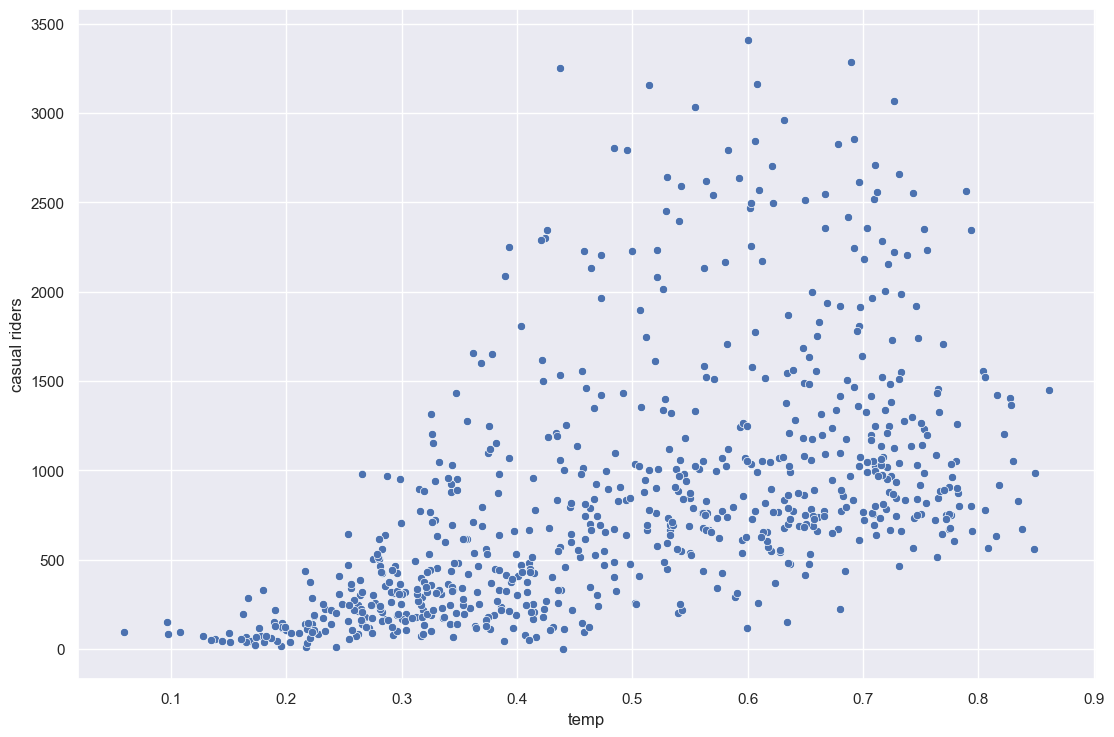

In [19]:
# Fill in the ellipses with your code
sns.scatterplot(x="temp", y="casual riders",
               data=bikes);

You can also look for patterns by grouping variables. For instance, we might want to look at behavior for casual riders on work days and compare that to non-work days. We can do this by adding the "is work day" variable as the *hue* of the scattered points to get a different color for each type of day.

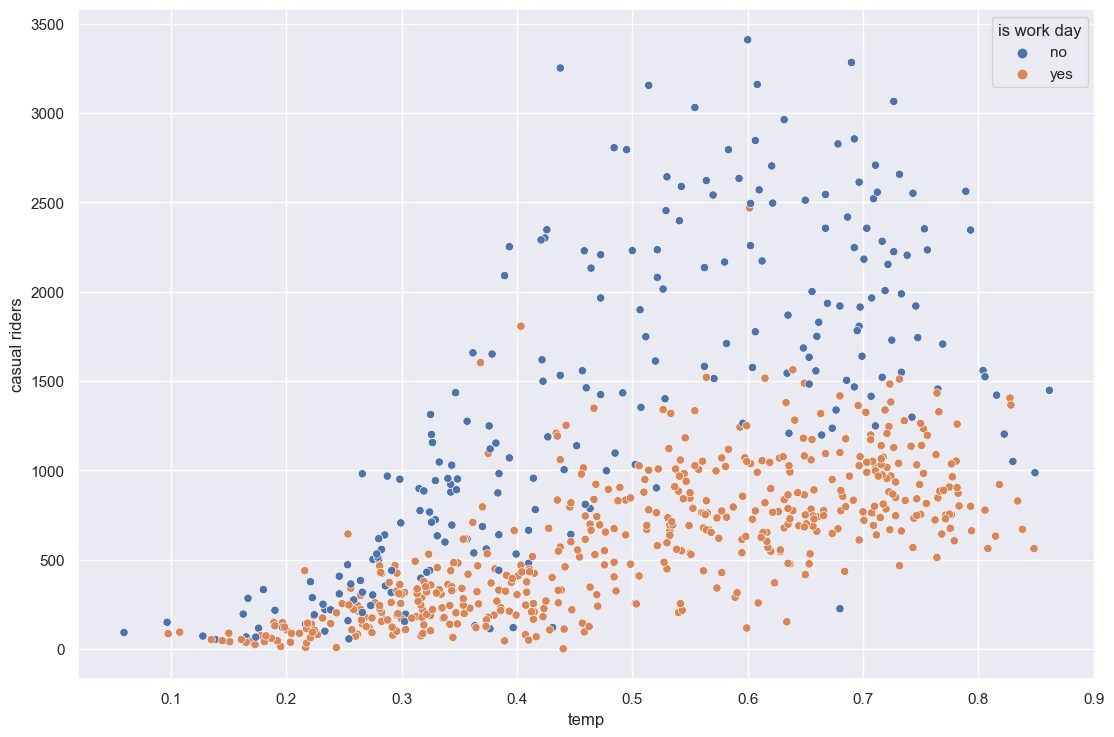

In [20]:
# plot temperature against casual riders, grouped by work day type
sns.scatterplot(x="temp", y="casual riders",
               data=bikes, hue="is work day");

In the following cell, we've created another widget to make it easier to compare multiple variables against one another.

In [21]:
# create a widget to make different scatter plots
explanatory_slider = widgets.Dropdown(options=["date", "temp", "felt temp", "humidity", "windspeed"])
def scatter_widget(var):
    sns.scatterplot(x=var, y="registered riders", data=bikes,
                   label="registered riders")
    sns.scatterplot(x=var, y="casual riders", data=bikes, 
                   label="casual riders")
    plt.xlim(bikes[var].min(), bikes[var].max())
    plt.legend()
    
widgets.interact(scatter_widget, var=explanatory_slider);

interactive(children=(Dropdown(description='var', options=('date', 'temp', 'felt temp', 'humidity', 'windspeed…

<div class="alert alert-warning">
<b>QUESTION:</b> Based on the scatter plots, which variables appear to be linearly correlated with rider counts? Which variables appear to be non-linearly correlated or uncorrelated? Is the apparent correlation different for casual or registered riders?
</div>

**ANSWER:** Date appears to be non-linearly correlated: the scatter plot follows a “wave” pattern that goes up in
summer months and down in winter months for casual and registered riders.
Temp and felt time may have a slight linear correlation: the scatter plots seem to go up slightly as
temperature goes up.
Windspeed and humidity may not be correlated- their scatter plot clouds look mostly shapeless.

Finally, we want to visualize our categorical variables using bar graphs. Remember, for categorical variables we are grouping rows into the different possible categories (like the seven days of the week) and aggregating all the values in the group into a single value (in this case, taking the average). 

Run the next cell to create a widget for making the different bar plots, with different color bars for each type of rider.

In [22]:
# define a function that groups by an explanatory variable and creates a bar graph
def bar_bikes(expl_var):
    bikes_categ = pd.read_csv("data/day_renamed_dso.csv")
    sns.barplot(x=expl_var, y="registered riders", data=bikes_categ)

explanatory_menu = widgets.Dropdown(options=[ "season", "month", "is holiday", "week day", "is work day",
                                            "weather",])
display(widgets.interactive(bar_bikes, expl_var=explanatory_menu))

interactive(children=(Dropdown(description='expl_var', options=('season', 'month', 'is holiday', 'week day', '…

<div class="alert alert-warning">
<b>QUESTION:</b> Many of our categorical variables are related to time (e.g. week day, month, etc). How do usage patterns over time differ for registered and casual users? In what categories do the different user types act similarly?
</div>

**ANSWER:** Ridership (both casual and registered) does seem to go up during warmer months and seasons
and fall in cooler times. Casual and registered riders also act similarly in relation to the weather- the
worse the weather is, the fewer people ride.
Casual and registered riders tend to act oppositely in relation to the type of work day. Casual ridership
goes up on holidays and weekends, while registered ridership goes up on weekdays and non-holidays.

##  6c.The Test-Train Split <a id="section2"> </a>

When we train a model on a data set, we run the risk of [**over-fitting**](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html). Over-fitting happens when a model becomes so complex that it makes very accurate predictions for the data it was trained on, but it can't generalize to make good predictions on new data.

Over- and under-fitting are most easily explained visually. The [Scikit-Learn machine learning library](http://scikit-learn.org) has a good example:

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png"/>

The linear model on the left is **under-fitting**: we can see that there is a lot of vertical distance (the *error*) between the actual samples (the dots) and the prediction (the blue line). The 15-degree model on the right is over-fitting: there's almost no error, but the model is so complex it is unlikely to generalize to new data. Our goal is to get the model in the middle: reduce the error as much as possible while keeping the complexity low.

We can reduce the risk of overfitting by using a **test-train split**. 

1. Randomly divide our data set into two smaller sets: one for training and one for testing
2. Train the data on the training set, changing our model along the way to increase accuracy
3. Test the data's predictions using the test set.

<div class="alert alert-info">

**Over-fitting to the test set**
By using the test set over and over to check the predictive accuracy of different models, we run the risk of over-fitting to the test set as well. In the real world, data scientists get around this by also using a **validation set**- a portion of training data that the model isn't trained on, used to find optimal *hyperparameters* for the model (parameters that are set before the model is trained). Because we're using only limited hyperparameters, and because our model is for educational purposes, we'll only use training and test sets.

</div>

The first step to dividing the data is to set the **random seed**. The random seed calibrates the pseudorandom number generator; it ensures that when we "randomly" split our data, we can replicate that "random" split in the future. This is important for **reproducibility**, which lets other scientists duplicate your analysis and assess its significance.

`np.random.seed` sets the seed. It can take any number as its argument; as long as it gets the same number in the future, it will perform "random" operations in the same way.

In [23]:
# set the random seed
np.random.seed(28)

The Scitkit-Learn machine learning Python library has a function called `train_test_split` that will automatically divide the data into a test and a training set. We've done a fairly standard split here: 80% of the data is in the training set, and 20% of the data is in the test set.

In [24]:
# run this cell to split the data into training and test DataFrames
bike_train, bike_test = train_test_split(bikes, test_size=0.2, 
                                           train_size=0.8)

In [25]:
# check the shapes of the new data sets
print("Original set shape: {}".format(bikes.shape))
print("Training set shape: {}".format(bike_train.shape))
print("Test set shape: {}".format(bike_test.shape))

Original set shape: (731, 15)
Training set shape: (584, 15)
Test set shape: (147, 15)


<div class="alert alert-warning">
    <p><b>QUESTION:</b> Data are often expensive to collect, and having a good predictive model can be the difference between success and ruin. Given these factors, the decision of how much data to set aside for testing and validation is very much a matter of opinion.
    </p>
    <p>What are some reasons for putting a larger portion of data into the training set? What are some downsides? Think about monetary and computational costs, as well as the potential risks of having a model that makes inaccurate predictions.</p>
</div>

**ANSWER:** Putting more data in the training set might make sense, because we want our model to
generalize as well as possible to data it hasn’t been trained on. If the model doesn’t see enough examples
in its training data, it will be biased towards the few it did see and may give inaccurate predictions. Also,
given that data collection is expensive, it can be tempting to put as much of the data we collect as possible
into the model, rather than using it to test the model.

However, putting too much data in the training set (and too little in testing and validation sets) can
mean that we won’t have a measure of how well our model generalizes to data it hasn’t been trained on.
This can have major consequences- if a model performs very well on training data and we have no testing
data, using that model in decision making can have high costs (e.g. not allocating enough bikes in our
bike-sharing venture, or buying too many bikes) or huge consequences (e.g. misdiagnosing a patient in a
predictive healthcare model). Models with large training sets also may take a lot more time to train or make
predictions. For very large data sets, this could be a day or more.